In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('Iris (1).csv')
print('Dataset Loaded Successfully !')


Dataset Loaded Successfully !


In [ ]:
  df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# split the -> features and target
X = df.iloc[:, :-1]  # Independent variables
y = df.iloc[:, -1]   # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 5)
Testing set size: (30, 5)


In [ ]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,40,5.1,3.4,1.5,0.2
53,54,5.5,2.3,4.0,1.3
79,80,5.7,2.6,3.5,1.0
10,11,5.4,3.7,1.5,0.2
50,51,7.0,3.2,4.7,1.4
...,...,...,...,...,...
8,9,4.4,2.9,1.4,0.2
73,74,6.1,2.8,4.7,1.2
144,145,6.7,3.3,5.7,2.5
118,119,7.7,2.6,6.9,2.3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # how KNN works ?
iris_model = KNeighborsClassifier()

In [ ]:
iris_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Y_prediction = iris_model.predict(X_test)

In [ ]:
y_test

,Species
82,Iris-versicolor
134,Iris-virginica
114,Iris-virginica
42,Iris-setosa
109,Iris-virginica
57,Iris-versicolor
1,Iris-setosa
70,Iris-versicolor
25,Iris-setosa
84,Iris-versicolor


In [ ]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_prediction))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Predict one sample (values in same order as dataset features)
iris_model.predict([[1	,5.1,	3.5,	1.4,	0.2	]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

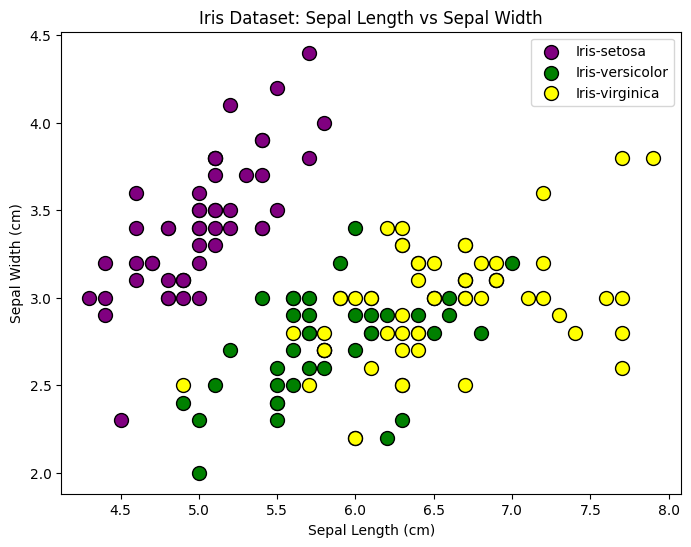

In [ ]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

# Define colors for each species
colors = ['purple', 'green', 'yellow']
species = le.classes_  # ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(8,6))

for i, sp in enumerate(species):
    subset = df[df['Species_encoded'] == i]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'],
                c=colors[i], label=sp, s=100, edgecolor='k')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend()
plt.show()

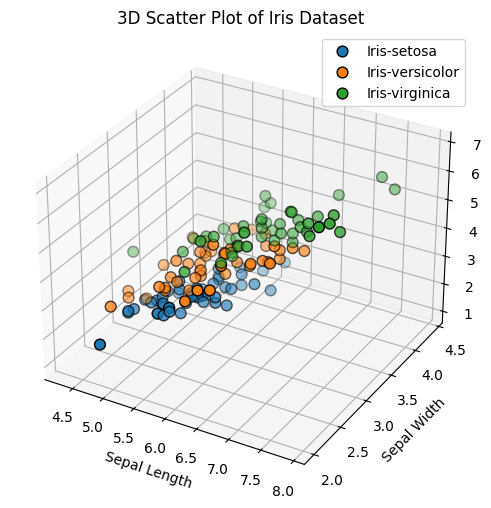

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i, sp in enumerate(df['Species'].unique()):
    subset = df[df['Species'] == sp]
    ax.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], subset['PetalLengthCm'],
               label=sp, s=60, edgecolor='k')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title("3D Scatter Plot of Iris Dataset")
ax.legend()
plt.show()


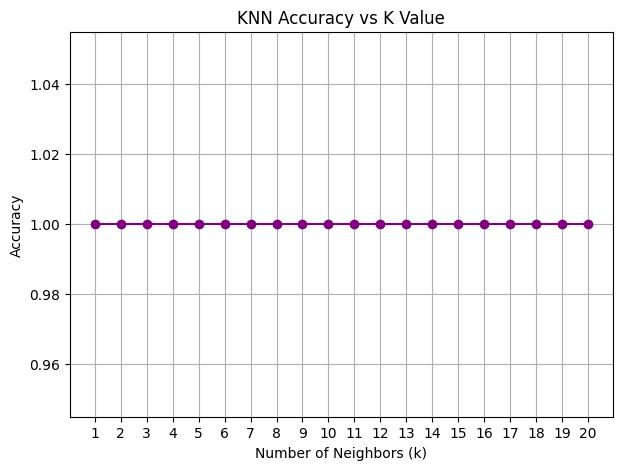

In [ ]:

k_values = range(1, 21)  # test K from 1 to 20
accuracies = []

for k in k_values:
    # Update n_neighbors for this iteration
    iris_model.n_neighbors = k
    iris_model.fit(X_train, y_train)
    acc = iris_model.score(X_test, y_test)  # test set accuracy
    accuracies.append(acc)

# Plot K vs Accuracy
plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies, marker='o', color='purple')
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.grid(True)
plt.show()
